In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import json
from get_utils import get_data, get_dir
import plot as plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


#%matplotlib widget
#%matplotlib qt
%matplotlib inline

# Directory info
This is the format that I use for generating directory when I train models. I use the network size of 128 for all analysis.

In [2]:
folder_name = 'Sim_fixed_128'
n_model = 40 # number of simulated networks



root_dir = '/Volumes/T9/MotorNet'

base_dir = root_dir
save_fig = os.path.join(os.path.expanduser('~'),'Dropbox/Projects/papers/MotorSavings/paper/figures_raw')

# Simple test

you can plot the test for one network just to get a sense how different aspect of loss function change over time for single network

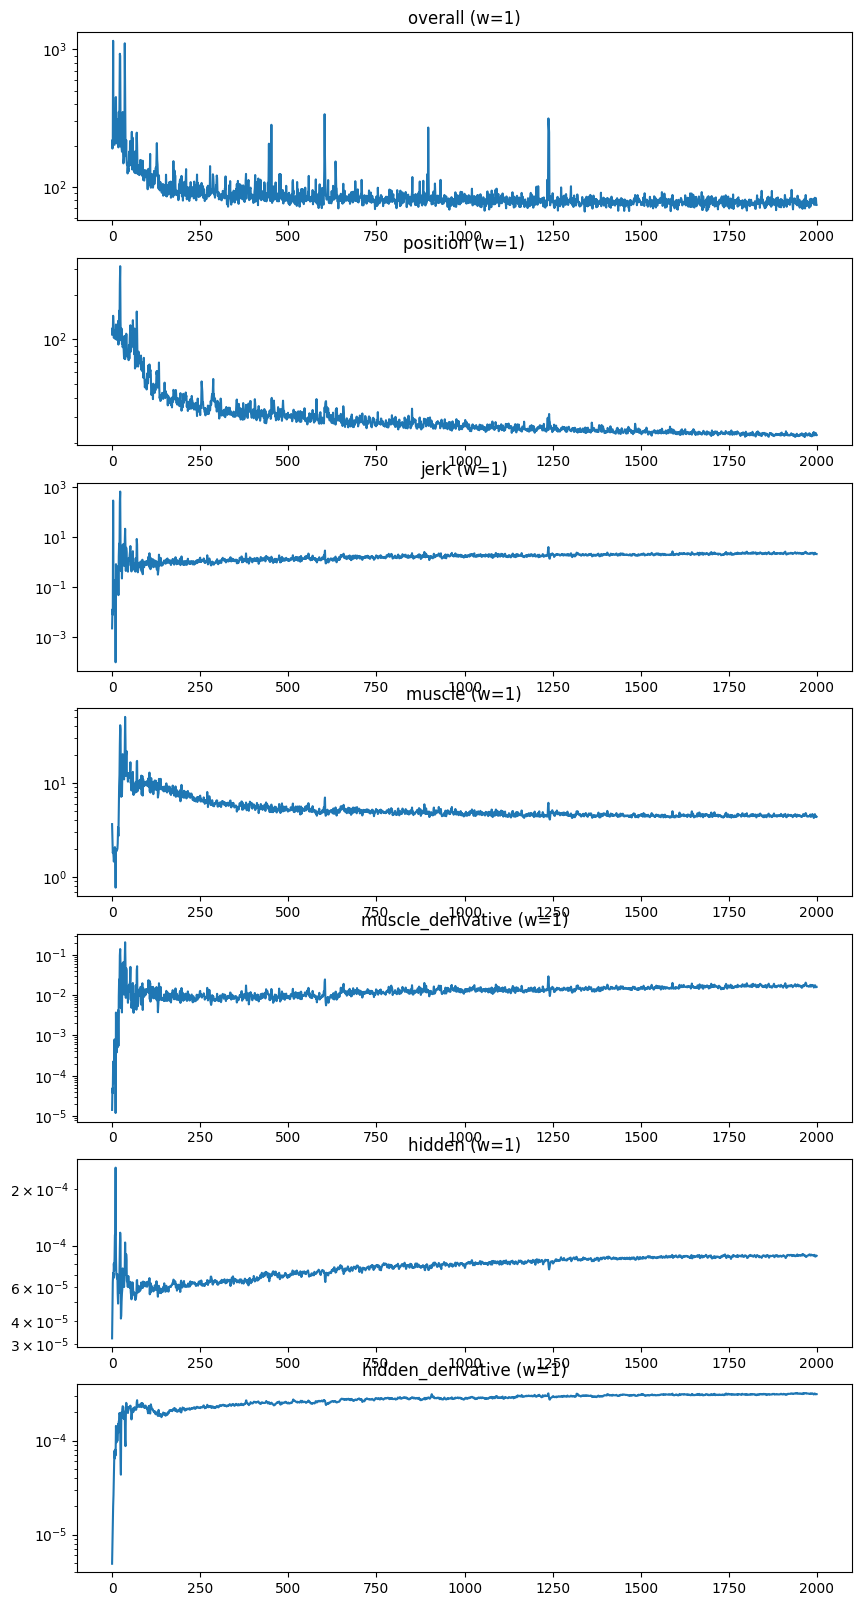

In [3]:
_,_,loss_file = get_dir(folder_name, 'model01','growing_up', ff_coef=0)
# load all losses
log = json.load(open(loss_file,'r'))

fig,ax = plt.subplots(7,1,figsize=(10,20))
for j,loss in enumerate(log.keys()):
    if j>=7:
        continue
    plot.plot_learning_curve(ax[j],log,loss_type=loss, w=10)
    ax[j].set_title(f"{loss} (w={1})")
#fig.savefig(os.path.join(data_dir,'loss_FF1.png'),dpi=300)

# Plot trajectories

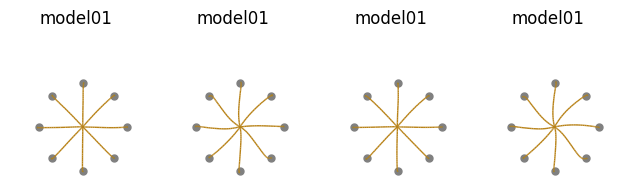

In [ ]:
# Get data
model_name = 'model14'

#for mo in range(n_model):
mo=1
model_name = f'model{mo:02d}'
data = get_data(folder_name,model_name,is_channel=False,n_hidden=128)

# PLOT
fig,ax = plt.subplots(1,4,figsize=(20/3,2.5))


colors = [[184/255, 130/255, 23/255, 1]]
cmap = ListedColormap(colors,N=1)

for i in range(4):
    plot.plot_simulations(ax[i],xy=data[i]['xy'],target_xy=data[i]['tg'],cmap=cmap,s=25,plot_circle=False,color_dot=np.array([0.5,0.5,0.5,1])) 
    ax[i].set_title(f'{model_name}')


plt.tight_layout()
plt.show()
#fig.savefig(os.path.join(save_fig,'traj_FF_on.pdf'),dpi=300,bbox_inches='tight')

# plot kinematics
## figure method in paper
Including position and velocity over time

In [7]:
i = 0 # which reaching trajectory I am using (0: right most)

# Extract and convert data to numpy arrays
vel = np.array(data[0]['vel'][i])
goal = np.array(data[0]['tg'][i])
xy = np.array(data[0]['xy'][i])
hidden = np.array(data[0]['all_hidden'][i,:,:])
muscle = np.array(data[0]['all_action'][i,:,:])
epforce = np.array(data[0]['endpoint_force'][i,:,:])


# Calculate the number of time points
n_time = np.shape(xy)[0]

# Define start and target points
start = goal[0]
target = goal[-1]

# Normalize goal and xy by subtracting the start position
goal = goal-start
xy = xy-start

# Normalize the target position
target = target - start
start = start - start

# Create tiled arrays for start and target positions
start = np.tile(start, (n_time, 1))
target = np.tile(target, (n_time, 1))

# Define time step and create a time vector
dt = 0.01
x = np.linspace(0, n_time * dt, n_time) - 0.5

# Find the index where the goal changes
go_index = np.where(np.diff(goal, axis=0) != 0)[0][0]

# Create a go cue array with ones
go_cue = np.ones((goal.shape[0], 1))

# Set elements before the go_index to zero
go_cue[:go_index] = 0

In [8]:
# Define the color array
color_xy = np.ones((2, 4))
color_xy[0, :3] = (34/255, 139/255, 34/255)
color_xy[1, :3] = (218/255, 165/255, 32/255)

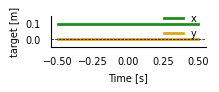

In [9]:
fg, ax = plot.my_plot(x,target,color_xy,(2,0.4),labels=['x','y'],ylim=[-0.05,0.15],plot0=True,ylabel='target [m]',linestyle=None)
#fg.savefig(os.path.join(save_fig,'target.pdf'),dpi=300,bbox_inches='tight')

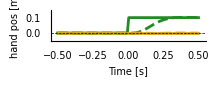

In [10]:
fg, ax = plot.my_plot(x,np.c_[goal, xy],np.r_[color_xy, color_xy],(2,0.4),labels=None,ylim=[-0.05,0.15],plot0=True,ylabel='hand pos [m]',linestyle=['-','-','--','--'])
# fg.savefig(os.path.join(save_fig,'xy.pdf'),dpi=300,bbox_inches='tight')

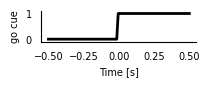

In [11]:
fg, ax = plot.my_plot(x,go_cue,['k'],(2,0.4),labels=None,ylim=[-0.1,1.1],plot0=False,ylabel='go cue',linestyle=None)
# fg.savefig(os.path.join(save_fig,'go_cue.pdf'),dpi=300,bbox_inches='tight')

# Plot hidden activity and muscle force

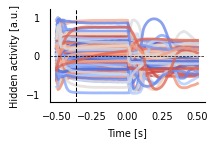

In [12]:
color_hidden1 = plt.cm.coolwarm(np.linspace(0, 1, hidden.shape[1]))
np.random.shuffle(color_hidden1)

fg, ax = plot.my_plot(x,hidden,color_hidden1,(2,1.2),labels=None,ylim=[-1.2,1.2],plot0=True,ylabel='Hidden activity [a.u.]',alpha=0.75)
ax.axvline(-0.36,color='k',linestyle='--',linewidth=0.75)
#fg.savefig(os.path.join(save_fig,'hidden.pdf'),dpi=300,bbox_inches='tight')

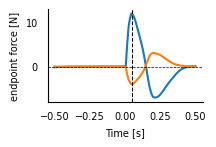

In [13]:
fg, ax = plot.my_plot(x,epforce,None,(2,1.2),labels=None,ylim=None,plot0=True,ylabel='endpoint force [N]')
ax.axvline(0.05, color='k', linestyle='--',linewidth=0.75)
# fg.savefig(os.path.join(save_fig,'ep_force.pdf'),dpi=300,bbox_inches='tight')

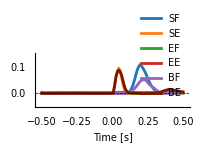

In [14]:
color_output = np.ones((6,4))
color_output[0,:3] = (31/255,119/255,180/255)
color_output[1,:3] = (255/255,127/255,14/255)
color_output[2,:3] = (44/255,160/255,44/255)
color_output[3,:3] = (213/255,39/255,40/255)
color_output[4,:3] = (148/255,103/255,189/255)
color_output[5,:3] = (122/255,21/255,0/255)

labels = ['SF','SE','EF','EE','BF','BE']


fg, ax = plot.my_plot(x,muscle,color_output,(2.,0.7),labels=labels,ylim=[-0.05,0.15],plot0=True,ylabel='',linestyle=None)
#fg.savefig(os.path.join(save_fig,'target.pdf'),dpi=300,bbox_inches='tight')

# Plot produced lateral force in channel trials

`endpoint_load` is the load the we applid on the effector so to restrict the trajectory to be the straight line connecting start location and target

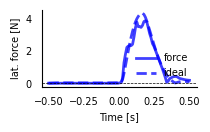

In [15]:
data = get_data(folder_name,'model01',is_channel=True,n_hidden=128)

epload = np.linalg.norm(data[1]['endpoint_load'],axis=2)[i,:]
vel = 8*np.linalg.norm(data[1]['vel'],axis=2)[i,:]
y = np.c_[epload,vel]

fg, ax = plot.my_plot(x,y,['b','b'],(2,1),labels=['force','ideal'],ylim=None,plot0=True,ylabel='lat. force [N]',linestyle=['-','--'],alpha=0.75)

In [26]:
np.argmin(x-0.09)

0

In [40]:
acc = np.linalg.norm(np.diff(data[1]['vel'],axis=1),axis=2)[i,:]
acc = np.r_[0,acc]
acc.shape

(100,)

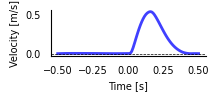

In [46]:
data = get_data(folder_name,'model01',is_channel=True,n_hidden=128)

# epload = np.linalg.norm(data[1]['endpoint_load'],axis=2)[i,:]
vel = np.linalg.norm(data[1]['vel'],axis=2)[i,:]
acc = np.linalg.norm(np.diff(data[1]['vel'],axis=1),axis=2)[i,:]
acc = np.r_[0,acc]
y = vel[:,np.newaxis]

fg, ax = plot.my_plot(x,y,['b'],(2,0.6),labels=None,ylim=None,plot0=True,ylabel='Velocity [m/s]',linestyle=['-'],alpha=0.75)
fg.savefig(os.path.join(save_fig,'vel_bell.pdf'),dpi=300,bbox_inches='tight')
# plt.axvline(x=0.09, color='k', linestyle='--',linewidth=0.75)

# look into the growing-up phase

In [60]:
data_g = get_data(folder_name,'model01',{'growing_up':[0]},[0],n_hidden=128,condition='train',batch_size=32)

xy=data_g[0]['xy']
target_xy=data_g[0]['tg']

#xy=data[0]['xy']
#target_xy=data[0]['tg']

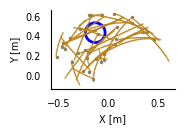

In [61]:
fig,ax = plt.subplots(1,1,figsize=(2,2))
ax = plot.plot_simulations(ax,xy=data_g[0]['xy'],target_xy=data_g[0]['tg'],s=2,plot_circle=True,color_dot=np.array([0.5,0.5,0.5,1]),set_lim=False,set_label=True) 
fig.savefig(os.path.join(save_fig,'workspace.pdf'),dpi=300,bbox_inches='tight')

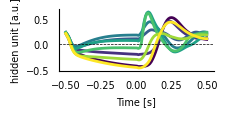

In [55]:
data = get_data(folder_name,model_name,is_channel=False,n_hidden=128)
j = 53 # [53,72,92]
hidden = np.array(data[0]['all_hidden'][:,:,j]).T

colormap = plt.cm.viridis
color_hidden2 = [colormap(i/7) for i in range(8)]


fg, ax = plot.my_plot(x,hidden,color_hidden2,(2,0.8),labels=None,ylim=None,plot0=True,ylabel='hidden unit [a.u.]')
#ax.axvline(-0.36,color='k',linestyle='--',linewidth=0.75)
fg.savefig(os.path.join(save_fig,'neuron_53.pdf'),dpi=300,bbox_inches='tight')